## Riemannian Gradient Functions for Sphere

In [30]:
function RGD(x0,Retract,RGrad;tol=1e-7,Nmax=10000,t=0.05,ObjFun=empty)
    xk = x0
    x = zeros(length(x0),Nmax+1)
    x[:,1] = xk
    if ObjFun == empty
        for k in 2:Nmax+1
            sk = -t*RGrad(xk)
            xk1 = Retract(sk,xk)
            x[:,k] = xk1
            err = norm(xk1-xk,2)/norm(xk,2)
            if err <= tol
                return x[:,1:k]
            end
            xk = xk1
        end
    else
        # line search
        for k in 2:Nmax+1
            t = 0.5
            grdfx = RGrad(xk)
            fun(α) = ObjFun(Retract(-α*grdfx,xk))
            fx = ObjFun(xk)
            t = linesearch(t,fun,fx,grdfx)
            sk = -t*grdfx
            xk1 = Retract(sk,xk)
            x[:,k] = xk1
            err = norm(xk1-xk,2)/norm(xk,2)
            if err <= tol
                return x[:,1:k]
            end
            xk = xk1
        end
    end
    return x
end
function SphereRGrad(x,Gradf)
    n = length(x)
    return (I-x*x')*Gradf(x)
end
function SphereRet(v,x)
    return (x+v)./norm(x+v)
end
function linesearch(t,fun,fx,grdfx)
    while fx-fun(t)<1e-4*t*norm(grdfx,2)^2
        t *= 0.7
    end
    return t
end
    

linesearch (generic function with 1 method)

## Setup Objective Function, Gradients, and x0

In [34]:
using Random, LinearAlgebra
A = rand(10,10)
A = 1/2*(A+A')
Objf(x) = 1/2*dot(x,A*x)
df(x) = A*x
RGrad(x) = SphereRGrad(x,df)
x0 = rand(10,1);

## Riemannian Gradient Descent - Constant Step Size

In [42]:
xRGD = RGD(x0,SphereRet,RGrad,tol=1e-8);

## RGD - Line Search

In [53]:
xRGDls = RGD(x0,SphereRet,RGrad,tol=1e-8,ObjFun=Objf);

## RGD - Euclidean Gradient

In [68]:
xEG = RGD(x0,SphereRet,df,tol=1e-8);

In [69]:
fRGD = zeros(size(xRGD,2),1)
reltol = zeros(size(xRGD,2)-1,1)
fRGDls = zeros(size(xRGDls,2),1)
reltolls = zeros(size(xRGDls,2)-1,1)
fEG = zeros(size(xEG,2),1)
reltolEG = zeros(size(xEG,2)-1,1)

for k in 1:length(fRGD)
    fRGD[k] = f(xRGD[:,k])
end
for k in 1:length(reltol)
    reltol[k] = norm(xRGD[:,k+1]-xRGD[:,k])/norm(xRGD[:,k])
end

for k in 1:length(fRGDls)
    fRGDls[k] = f(xRGDls[:,k])
end
for k in 1:length(reltolls)
    reltolls[k] = norm(xRGDls[:,k+1]-xRGDls[:,k])/norm(xRGDls[:,k])
end

for k in 1:length(fEG)
    fEG[k] = f(xEG[:,k])
end
for k in 1:length(reltolEG)
    reltolEG[k] = norm(xEG[:,k+1]-xEG[:,k])/norm(xEG[:,k])
end

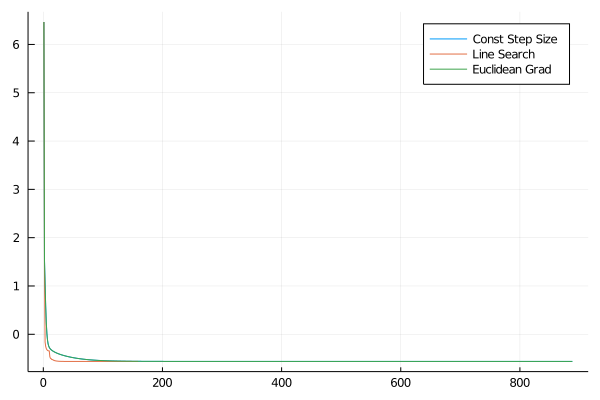

In [70]:
using Plots
plot(fRGD,label="Const Step Size")
plot!(fRGDls,label="Line Search")
plot!(fEG,label="Euclidean Grad")

Can see this is a descent algorithm because $f(x_{k+1}) \leq f(x_k)$.

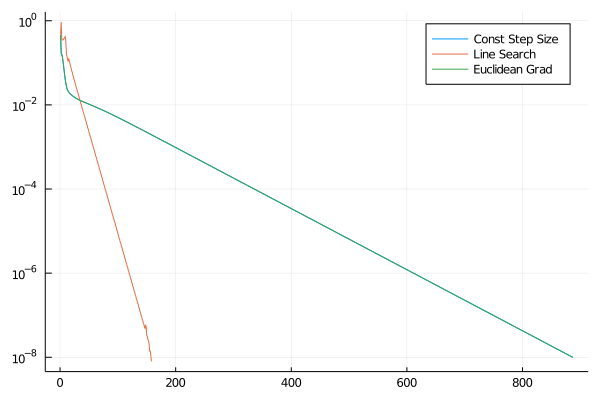

In [71]:
plot(reltol,yaxis=:log,label="Const Step Size")
plot!(reltolls,yaxis=:log,label="Line Search")
plot!(reltolEG,yaxis=:log,label="Euclidean Grad")

Relative error used for stopping condition in RGD.

In [57]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 -1.1238499078419895
 -0.7735817991337886
 -0.4538161283877479
 -0.4408645904252032
 -0.16658492496390753
  0.41107172960455607
  0.5662316047845393
  0.7337117364109829
  1.119356895829104
  5.4613975244427415
vectors:
10×10 Array{Float64,2}:
 -0.380891  -0.648559   -0.29123    …  -0.286926    0.366181   -0.247939
 -0.117354   0.406242    0.276559      -0.0134055   0.224786   -0.292611
  0.188298  -0.01483     0.613583      -0.182458    0.239232   -0.336818
 -0.318722   0.0764919   0.0431466     -0.314337   -0.21382    -0.287412
  0.316729  -0.0263878  -0.297009       0.0743468  -0.306868   -0.297571
  0.526948  -0.103979   -0.275682   …   0.01684    -0.124315   -0.300542
 -0.462297   0.38957    -0.334607       0.44716     0.0382271  -0.328601
 -0.142265   0.0575165   0.0653877     -0.409541   -0.595758   -0.311428
  0.303326   0.243805   -0.271187      -0.174727    0.484401   -0.34746
 -0.01

In [77]:
[f(xRGD[:,end])*2 f(xRGDls[:,end])*2 f(xEG[:,end])*2]

1×3 Array{Float64,2}:
 -1.12385  -1.12385  -1.12385

In [76]:
[xRGD[:,end] xRGDls[:,end] xEG[:,end]]

10×3 Array{Float64,2}:
 -0.380892   -0.380891   -0.380892
 -0.117354   -0.117354   -0.117354
  0.188298    0.188298    0.188298
 -0.318722   -0.318722   -0.318722
  0.316729    0.316729    0.316729
  0.526948    0.526948    0.526948
 -0.462297   -0.462297   -0.462297
 -0.142265   -0.142265   -0.142265
  0.303326    0.303326    0.303326
 -0.0123963  -0.0123961  -0.0123963

We can see that the optimal solution found is indeed the eigenvector corresponding to the most negative eigenvalue of $A$.

In [81]:
err = sqrt.(sum((xRGD-xEG).^2,dims=1))

1×888 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [87]:
xk = xRGD[:,end]
t = 0.05
skRGD = -t*RGrad(xk)
xk1RGD = SphereRet(skRGD,xk)

10-element Array{Float64,1}:
 -0.38089181225350943
 -0.1173536960166459
  0.1882981584343199
 -0.3187223159578168
  0.31672908778052644
  0.5269476837214885
 -0.4622968255854494
 -0.142265117922789
  0.3033263311805249
 -0.01239628545440557

In [88]:
xk = xEG[:,end]
t = 0.05
skEG = -t*df(xk)
xk1EG = SphereRet(skEG,xk)

10-element Array{Float64,1}:
 -0.3808918126101313
 -0.11735369579326646
  0.18829815842616582
 -0.3187223159157563
  0.3167290877660161
  0.5269476836643133
 -0.46229682537123784
 -0.14226511789116233
  0.30332633131458525
 -0.012396285689144713

In [89]:
[skRGD skEG]

10×2 Array{Float64,2}:
  6.70305e-9   -0.0214033
 -4.19863e-9   -0.0065944
  1.53264e-10   0.0105809
 -7.90568e-10  -0.0179098
  2.72735e-10   0.0177978
  1.07466e-9    0.0296105
 -4.02631e-9   -0.0259776
 -5.94453e-10  -0.00799423
 -2.51979e-9    0.0170447
  4.41215e-9   -0.000696574

The gradients are different, and hence the $s_k$'s are different, but the retraction function somehow produces the same iterate $x_{k+1}$ resulting in the same iterations. This suggests, to me, RGD for the sphere is the same as a projected gradient descent because the retraction just projects the update to the unit sphere.